In [111]:
import numpy as np
import pandas as pd

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


IMPORT DATA

In [113]:
df=pd.read_csv("data.csv")

In [114]:
print(df.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [115]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [117]:
print(df.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

FROM THE ABOVE DATSET NO NULL VALUES FOUND

D A T A
C L E A N I N G

In [118]:
for i in df.columns:
    df=df.rename(columns={i: i.strip().replace(" ","_").lower()})

df.rename(columns={'bankrupt?':'bankrupt'},inplace=True)

In [119]:
df.columns

Index(['bankrupt', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax_

In [120]:
for i in df.columns:
    print(f"*************** {i}*********************")
    print(df[i].value_counts())

*************** bankrupt*********************
bankrupt
0    6599
1     220
Name: count, dtype: int64
*************** roa(c)_before_interest_and_depreciation_before_interest*********************
roa(c)_before_interest_and_depreciation_before_interest
0.490128    12
0.516453    11
0.499196    10
0.513821    10
0.501926     9
            ..
0.624482     1
0.525910     1
0.400331     1
0.540828     1
0.388680     1
Name: count, Length: 3333, dtype: int64
*************** roa(a)_before_interest_and_%_after_tax*********************
roa(a)_before_interest_and_%_after_tax
0.559693    13
0.568251    13
0.554187    10
0.557894    10
0.566016    10
            ..
0.626744     1
0.662396     1
0.509213     1
0.415177     1
0.451265     1
Name: count, Length: 3151, dtype: int64
*************** roa(b)_before_interest_and_depreciation_after_tax*********************
roa(b)_before_interest_and_depreciation_after_tax
0.552492    10
0.558220    10
0.538787    10
0.551475    10
0.554045     9
            .

 Net Income Flag  , remvoing this column , since it consisists same value accross the rows.. , which won't add anything to the model..


In [121]:
df = df.drop(columns=[
    "net_income_flag"          # constant column
], errors="ignore")

PLOTTING THE DATA POINTS ON THE GRAPH

In [122]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='bankrupt')
y=df['bankrupt']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5114, 94), (5114,), (1705, 94), (1705,))

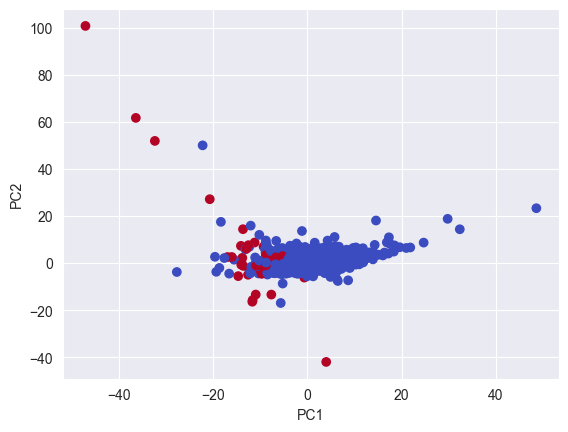

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


FEATURE ENGINEERING

From the above chart we can see , there are few outliers , lets see those will contribute to result , since they look like rare cases..!


In [124]:
df['bankrupt'].value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

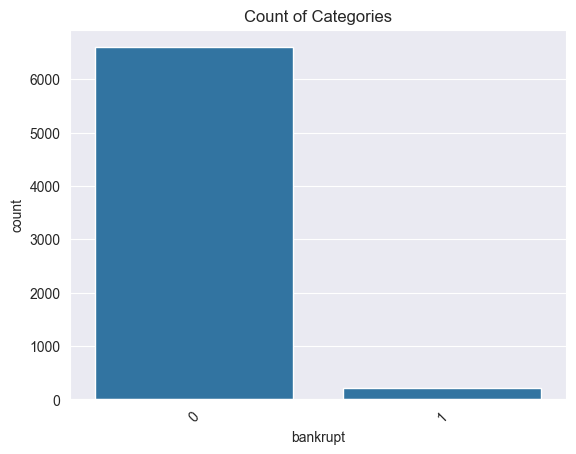

In [125]:
sns.countplot(data=df, x='bankrupt')
plt.xticks(rotation=45)
plt.title("Count of Categories")
plt.show()

After the split


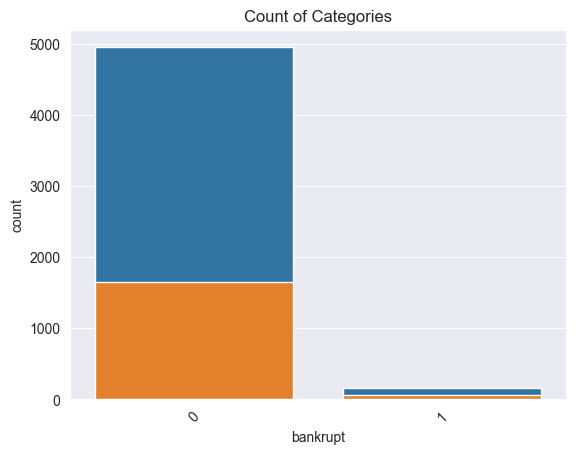

In [126]:
sns.countplot(x=y_train)
sns.countplot(x=y_test)
plt.xticks(rotation=45)
plt.title("Count of Categories")
plt.show()

We are going to use SMOTE first to balance the imbalanced sets to become balanced..!

In [127]:
from imblearn.over_sampling import SMOTE

resample=SMOTE(random_state=42)

X_train_SM,y_train_SM=resample.fit_resample(X_train,y_train)

In [128]:
y_train_SM.value_counts()

bankrupt
0    4949
1    4949
Name: count, dtype: int64

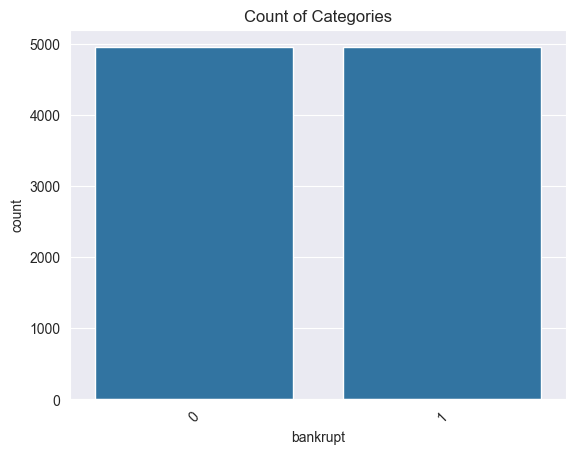

In [129]:
sns.countplot(x=y_train_SM)
plt.xticks(rotation=45)
plt.title("Count of Categories")
plt.show()

Classes balanced

Feature Scaling..

In [130]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
X_train_scaled=scaling.fit_transform(X_train)
X_test_scaled=scaling.transform(X_test)

X_train = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test= pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)


In [131]:
X_train.columns

Index(['roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax_net_profit_g

Checking for important features for feature reduction ! we will use PCA and alos we will use the blancing the weights

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, random_state=42)  # keep 90% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [133]:

X_train_pca.shape , X_test_pca.shape

((5114, 42), (1705, 42))

In [134]:
y_train.shape,y_test.shape

((5114,), (1705,))

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, classification_report

In [136]:
from xgboost import XGBClassifier

XGB_Model=XGBClassifier(n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42)

XGB_Model.fit(X_train_pca,y_train)

y_pred=XGB_Model.predict(X_test_pca)

In [137]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,classification_report,f1_score)

In [138]:
print('***** RESULTS *********')
print("accuracy : ",accuracy_score(y_test,y_pred))
print("precison : ",precision_score(y_test,y_pred))
print("recall : ",recall_score(y_test,y_pred))
print("CLASSFICATION REPORT\n",classification_report(y_test,y_pred))

***** RESULTS *********
accuracy :  0.9683284457478006
precison :  0.5454545454545454
recall :  0.10909090909090909
CLASSFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.55      0.11      0.18        55

    accuracy                           0.97      1705
   macro avg       0.76      0.55      0.58      1705
weighted avg       0.96      0.97      0.96      1705



In [139]:
type(y_test) , type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix=confusion_matrix(y_test,y_pred)


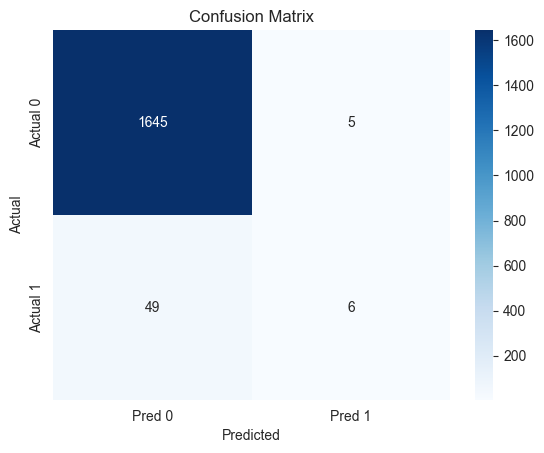

In [141]:
sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [142]:
type(confusion_matrix)

numpy.ndarray

still after the PCA we are lacking the required recall rate..!

Now , we will move to different path by reducing the features based on the importance/information gain with respect to output prediction

In [143]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [144]:
gain_dict = XGB.get_booster().get_score(importance_type="gain")

imp_df = (
    pd.DataFrame.from_dict(gain_dict, orient="index", columns=["gain"])
    .reset_index()
    .rename(columns={"index": "feature"})
)

# Add zero-gain features
all_features = set(X_train.columns)
used_features = set(imp_df["feature"])

zero_gain = all_features - used_features
zero_df = pd.DataFrame({"feature": list(zero_gain), "gain": 0.0})

imp_df = pd.concat([imp_df, zero_df], ignore_index=True)
imp_df = imp_df.sort_values("gain", ascending=False)

In [145]:
len(used_features) , len(all_features)

(78, 94)

In [146]:
drop_zero_gain = imp_df.loc[imp_df["gain"] == 0, "feature"].tolist()

X_train = X_train.drop(columns=drop_zero_gain)
X_test  = X_test.drop(columns=drop_zero_gain)

In [147]:
X_train.shape , X_test.shape

((5114, 78), (1705, 78))

In [148]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

In [149]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.inspection import permutation_importance

In [150]:

XGB.fit(X_train, y_train)


recall_scorer = make_scorer(recall_score)

perm = permutation_importance(
    XGB,
    X_test,
    y_test,
    scoring=recall_scorer,
    n_repeats=10,
    random_state=42
)

perm_df = pd.DataFrame({
    "feature": X_test.columns,
    "recall_impact": perm.importances_mean
}).sort_values("recall_impact", ascending=False)
# Drop features with ~zero recall impact
drop_perm = perm_df.loc[perm_df["recall_impact"] <= 0.0, "feature"].tolist()

X_train = X_train.drop(columns=drop_perm)
X_test = X_test.drop(columns=drop_perm)


XGB.fit(X_train, y_train)


THRESHOLD = 0.15

y_prob = XGB.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= THRESHOLD).astype(int)

print("FINAL RESULTS")
print("--------------")

print("Precision (bankruptcy):", precision_score(y_test, y_pred))
print("Recall    (bankruptcy):", recall_score(y_test, y_pred))

print("\nFinal feature count:", X_train.shape[1])

print("Dropped by zero-gain  :", len(drop_zero_gain))
print("Dropped by permutation:", len(drop_perm))

FINAL RESULTS
--------------
Precision (bankruptcy): 0.48
Recall    (bankruptcy): 0.43636363636363634

Final feature count: 44
Dropped by zero-gain  : 16
Dropped by permutation: 34


In [151]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

cm = sk_confusion_matrix(y_test, y_pred)

In [152]:
type(y_test) , type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

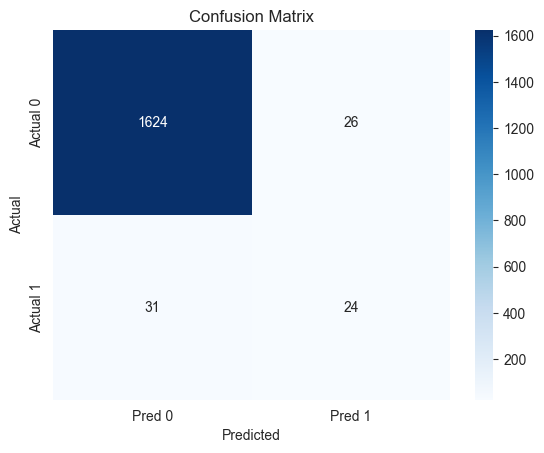

In [153]:


sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [154]:
neg,pos

(np.int64(4949), np.int64(165))

Now, Handling Class Imbalance Using Weighted XGBoost

In [155]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, recall_score

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

recall_scorer = make_scorer(recall_score)

param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.08],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

from xgboost import XGBClassifier

xgb_cv = XGBClassifier(
    n_estimators=300,
    scale_pos_weight=neg / pos,
    eval_metric="logloss",
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb_cv,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best CV Recall:", grid.best_score_)
print("Best Parameters:")
print(grid.best_params_)

best_xgb = grid.best_estimator_

best_xgb.fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score

THRESHOLD = 0.15

y_prob = best_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= THRESHOLD).astype(int)

print("FINAL TUNED RESULTS")
print("-------------------")
print("Precision (bankruptcy):", precision_score(y_test, y_pred))
print("Recall    (bankruptcy):", recall_score(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best CV Recall: 0.7030303030303029
Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.9}
FINAL TUNED RESULTS
-------------------
Precision (bankruptcy): 0.16216216216216217
Recall    (bankruptcy): 0.8727272727272727


In [156]:


cm=sk_confusion_matrix(y_test,y_pred)


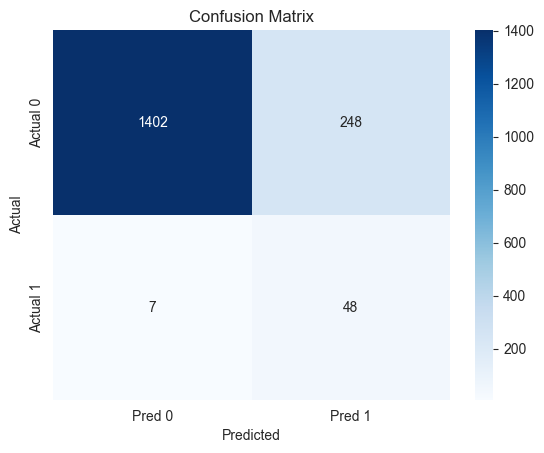

In [157]:


sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()